In [9]:
#importing required python libraries

import numpy as np
import pandas as pd
import cv2

In [2]:
#creates empty dataframe to store all pixel arrays

traindata=pd.DataFrame()

In [3]:
#this function takes input as video and generate gray,resized image arrays and store into dataframe

def video_to_frames_generatedata_adv(video):
    
    count=1
    new_width  = 128
    new_height = 72
    vidcap = cv2.VideoCapture(video)
    traindata=pd.DataFrame()
    
    while vidcap.isOpened():
        
        frameId =vidcap.get(1)
        success, image = vidcap.read()
        if success:
            if(frameId%3==0):
                    
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.resize(image,(new_width, new_height))
                    im = (np.array(image)).flatten().reshape(1,9216)
                    im=np.divide(im,255)
                    print("running : ", count)
                    data=pd.DataFrame(im)
                    traindata=traindata.append(data)
                
                    count=count+1
            if(count>2000):
                    break
                
        else:
            break
   
    cv2.destroyAllWindows()
    vidcap.release()   
    return traindata

In [ ]:
newdata=video_to_frames_generatedata_adv('My Video 1.mp4')
traindata=traindata.append(newdata)

In [6]:
traindata.shape

(2000, 9216)

In [7]:
#this function takes input as video and generate gray,resized image arrays and store into dataframe


def video_to_frames_generatedata_cric(video):
    
    count=1
    new_width  = 128
    new_height = 72
    vidcap = cv2.VideoCapture(video)
    traindata=pd.DataFrame()
    
    while vidcap.isOpened():
        
        frameId =vidcap.get(1)
        success, image = vidcap.read()
        if success:
            if(frameId%3==0):
                    
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.resize(image,(new_width, new_height))
                    im = (np.array(image)).flatten().reshape(1,9216)
                    im=np.divide(im,255)
                    print("running :", count)
                    data=pd.DataFrame(im)
                    traindata=traindata.append(data)
                
                    count=count+1
            if(count>8000):
                    break
                
        else:
            break
   
    cv2.destroyAllWindows()
    vidcap.release()   
    return traindata

In [ ]:
newdata=video_to_frames_generatedata_cric('My Video 2.mp4')
traindata=traindata.append(newdata)

In [9]:
traindata.shape

(10000, 9216)

In [10]:
#create labels for data generated

labelarray=np.array([])
i=1
while(i<2001):
    labelarray=np.append(labelarray,[0],axis=None)
    i=i+1       

In [11]:
j=1 
while(j<8001):
    labelarray=np.append(labelarray,[1],axis=None)
    j=j+1

In [12]:
labeldata=pd.DataFrame({'labels':labelarray})
labeldata=pd.get_dummies(labeldata['labels'])
labeldata.shape

(10000, 2)

In [13]:
#save data and labels to csv file,load these file and use in CNN

traindata.to_csv('traindata_gray.csv')

In [14]:
#save data and labels to csv file,load these file and use in CNN

labeldata.to_csv('labeldata_gray.csv')

In [1]:
import matplotlib.pyplot as plt

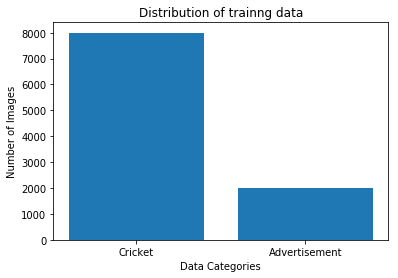

In [7]:
D = {'Cricket':8000, 'Advertisement': 2000}
plt.ylabel("Number of Images")
plt.xlabel("Data Categories")
plt.title("Distribution of input data")
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.show()

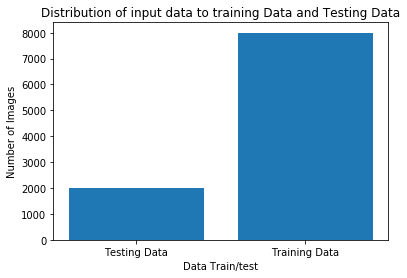

In [8]:
D = {'Training Data':8000, 'Testing Data': 2000}
plt.ylabel("Number of Images")
plt.xlabel("Data Train/test")
plt.title("Distribution of input data to training Data and Testing Data")
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.show()